<img src="https://beyondthestates.com/wp-content/uploads/2023/09/download.png" width=20% height=20%>

# Higher Diploma in Data Analytics course from [ATU](https://www.atu.ie/) in Winter 2024/25
##  Programming for Data Analytics - project 2024/2025
***



<div style="text-align:center">
<img src="img/Wind_turbines.jpg" width=60% height=80%>
<div style="text-align:center; font-size:10px;"><b>by stockertui @vecteezy.com </b>
</div>

### Project Overview 
***

In this project I need to demonstrate a data analysis of the wind speed in one of the Ireland's regions.
I will analyze 70 years of historical wind speed data from the Roches Point weather station in County Cork, Ireland. The data, sourced from the [Met Éireann historical dataset](https://www.met.ie/climate/available-data/historical-data), spans from January 1955 to December 2024, providing a comprehensive range for long-term trend analysis,  seasonal variations, and other patterns relevant to wind speed and energy production.

Roches Point Station is located at the southeastern tip of County Cork, near the entrance to Cork Harbour, a strategic coastal location that often experiences significant wind activity.
The station records meteorological data such as wind speed, temperature, and precipitation at hourly intervals, making it suitable for detailed analysis.
Its coastal location provides valuable insights into wind patterns influenced by the Atlantic Ocean, making it relevant for assessing wind energy potential in Ireland.

Here's what the dataset contains: 

- date:  -  Date and Time (utc)
- rain:  -  Precipitation Amount (mm)
- temp:  -  Air Temperature (C)
- wetb:  -  Wet Bulb Temperature (C)
- dewpt: -  Dew Point Temperature (C)
- vappr: -  Vapour Pressure (hPa)
- rhum:  -  Relative Humidity (%) 
- msl:   -  Mean Sea Level Pressure (hPa)
- wdsp:  -  Mean Wind Speed (kt)
- wddir: -  Predominant Wind Direction (deg)
- ind:   -  Indicator

To perform the analysis I will need data from `date`, `wdsp` and `wddir`. 


### Project Goal
***

The primary goal of this project is to analyze wind speed data `wdsp` to assess its potential for wind energy generation and explore historical trends and patterns. By focusing on one location and utilizing this long-term dataset, I will address the following key questions:

- How do wind speeds vary seasonally and annually at Roches Point?
- Are there noticeable trends in wind speeds over the past 70 years?
- What is the potential wind energy output for this location based on historical data?
- Are there seasonal or extreme wind events that impact energy reliability?


To perform this analysis I will use [Python](https://en.wikipedia.org/wiki/Python_(programming_language)) and its libraries: 

[Pandas](https://pandas.pydata.org/):
- Used to handle and preprocess the dataset (e.g., reading the CSV file, converting dates, grouping data).

[Matplotlib](https://matplotlib.org/):

- Used for creating plots to visualize trends and regression results.

[Scikit-Learn](https://scikit-learn.org/stable/index.html):

- Used to build and fit the linear regression model.

[NumPy](https://numpy.org/):

- Helps with numerical calculations.

### Importing the required Libraries
***


Import the pandas library. Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

In [47]:
import pandas as pd

NumPy is the next library I need. It is a fundamental package for scientific computing in Python that provides a multidimensional array object, various derived objects (such as masked arrays and matrices). 

In [48]:
import numpy as np

In [49]:
import matplotlib.pyplot as plt

In [50]:
import seaborn as sns

### Loading, Cleaning and Inspecting the Data
***
The dataset will be loaded into a Python environment using the `pandas` library. After loading, the data will be inspected for its structure, including column names, data types, and missing values etc.

Our dataset is saved in .csv file in this repository. After inspecting this data by reviewing the file, I need to ignore first 17 rows as they contain description elements and they are not part of the dataset, therefore they can be ignored. 

In [109]:
df = pd.read_csv('data/hly1075.csv', skiprows=17, low_memory=False) # https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,01-dec-1955 01:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16,1,170
1,01-dec-1955 02:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11,1,190
2,01-dec-1955 03:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9,1,160


Let's check the the data type of each column

In [110]:
df.dtypes
print(df.dtypes)

date     object
ind       int64
rain     object
ind.1     int64
temp     object
ind.2     int64
wetb     object
dewpt    object
vappr    object
rhum     object
msl      object
ind.3     int64
wdsp     object
ind.4     int64
wddir    object
dtype: object


As we can see both columns `wdsp` and `wddir` are showing as objects which means they might have contains other values than a float. Let's check the NaN values: 

In [111]:
# Check for missing values
nan_values = df.isna()
print(nan_values)

         date    ind   rain  ind.1   temp  ind.2   wetb  dewpt  vappr   rhum  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
585546  False  False  False  False  False  False  False  False  False  False   
585547  False  False  False  False  False  False  False  False  False  False   
585548  False  False  False  False  False  False  False  False  False  False   
585549  False  False  False  False  False  False  False  False  False  False   
585550  False  False  False  False  False  False  False  False  False  False   

          msl  ind.3   wdsp  ind.4  wdd

In [112]:
# Count missing values
df.isnull().sum()
print(df.isnull().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
dtype: int64


After using basic functions `df.isnull()` that shows True/False for missing values and `df.isnull().sum()` that shows total missing values per column, we can see that there is no missing/empty cells in this dataset. That would mean the cells that contain no data are not empty or zeroed, but they might contain a string placeholder for no-data cells. For more information you can look [here.](https://saturncloud.io/blog/how-to-check-if-a-particular-cell-in-pandas-dataframe-is-null/#:~:text=Checking%20for%20Null%20Values%20in%20Pandas%20DataFrame&text=To%20check%20for%20null%20values%20in%20a%20pandas%20DataFrame%2C%20we,cell%20is%20null%20or%20not.)

To find out, I will use the `unique()` function in Pandas. It is used to find all the distinct or unique values in a specific column. After running it, we can quickly understand the variety of values present in data, which in this case is a white space. For more information, you can look at documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [113]:
# Get unique values in the Mean Wind Speed column
unique_wdsp = df['wdsp'].unique()

print(unique_wdsp)

['16' '11' '9' '5' '12' '15' '13' '14' '7' '4' '3' '6' '1' '0' '21' '19'
 '23' '22' '20' '8' '2' '17' '18' '10' '25' '29' '26' '24' '27' '28' '30'
 '31' '36' '32' '33' '34' '40' '41' '42' '38' '35' '46' '48' '44' '37'
 '39' '43' '47' '50' '53' '54' '45' '51' '55' '49' '52' '59' '56' ' ' '62'
 '60']


In [114]:
# Get unique values in the Predominant Wind Direction column
unique_wddir = df['wddir'].unique()

print(unique_wddir)

['170' '190' '160' '140' '330' '340' '350' '320' '360' '10' '0' '230'
 '210' '200' '220' '250' '260' '280' '300' '240' '270' '310' '150' '180'
 '290' '40' '20' '50' '70' '60' '80' '110' '130' '100' '90' '120' '30' ' ']


As we can see in the range of unique values, in both columns appears to be `' '` value, which is a white space. That is why our data type was shown as object. To be able to use this data for analysing, I need to clean this data. 
I will create a new dataset `cleandf`. It will replace white spaces with `NaN` and then drop them from my dataset. 



In [115]:
cleandf = df[['wddir', 'wdsp']].copy()  # Make a copy of the dataframe

# Replace spaces with NaN for both columns
cleandf['wdsp'] = cleandf['wdsp'].replace(' ', np.nan)
cleandf['wddir'] = cleandf['wddir'].replace(' ', np.nan)

# Drop rows with NaN in either 'wdsp' or 'wddir'
cleandf.dropna(subset=['wdsp', 'wddir'], inplace=True)

# Convert 'wdsp' and 'wddir' to float
cleandf['wdsp'] = cleandf['wdsp'].astype(float)
cleandf['wddir'] = cleandf['wddir'].astype(float)

Let's check in once again: 

In [116]:
# Check for missing values
nan_values = cleandf.isna()
print(nan_values)

        wddir   wdsp
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
...       ...    ...
585546  False  False
585547  False  False
585548  False  False
585549  False  False
585550  False  False

[584955 rows x 2 columns]


In [117]:
# Count missing values
cleandf.isnull().sum()
print(cleandf.isnull().sum())

wddir    0
wdsp     0
dtype: int64


Now let's the the data type: 

In [118]:
# Checking the data type of each column
cleandf.dtypes
print(cleandf.dtypes)

wddir    float64
wdsp     float64
dtype: object


After completing above steps we prepared and cleaned some data by handling missing values and data types. 

*** DateTime

Now, I need to focus on date and time values that are crucial for my data analysis. Let's see how the date and time is presented in this dataset. I need to look at my original data frame. 

In [119]:
df['date'].head()

0    01-dec-1955 01:00
1    01-dec-1955 02:00
2    01-dec-1955 03:00
3    01-dec-1955 04:00
4    01-dec-1955 05:00
Name: date, dtype: object

Date and time are stored together in single column, so it can limit the flexibility of my analysis. Splitting them into separate columns can allow me to use this data in more efficient way.  

To answer my first key question *How do wind speeds vary seasonally and annually at Roches Point?* I will first group the time by months, so I can analyse seasonal variations. 

In [120]:
# Converting the date column from string format ('DD-MMM-YYYY HH:MM') to datetime object
df['datetime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

# Extracting the month from the 'datetime' column
df['month'] = df['datetime'].dt.month

# Adding the 'month' column to new dataframe 'cleandf'
cleandf['month'] = df['month']

Now I want to verify that my new dataframe `cleandf` contains the necessary columns, including wind speed `wdsp` and the newly added month.

In [121]:
# checking the first few rows of the new dataframe
print(cleandf.head())

# Checking the columns of the new dataframe
print(cleandf.columns) 

   wddir  wdsp  month
0  170.0  16.0     12
1  190.0  11.0     12
2  160.0   9.0     12
3  140.0   5.0     12
4  330.0  12.0     12
Index(['wddir', 'wdsp', 'month'], dtype='object')


The `datetime` module represents the numerical month, therefore December is represented as 12, January as 1, February as 2 and so on. I found this information in the documentation [here](https://docs.python.org/3/library/datetime.html).

Let's see the average wind speed for Roches Point for each month across our data:

In [122]:
# Grouping by month and calculating the mean wind speed
monthly_avg = cleandf.groupby('month')['wdsp'].mean()

# printing the monthly average wind speed
print(monthly_avg)

month
1     12.358806
2     12.133657
3     11.488303
4     10.378298
5      9.948699
6      9.345766
7      9.059754
8      9.310737
9      9.867759
10    11.096917
11    11.560873
12    12.518697
Name: wdsp, dtype: float64


To visualise the above trends, let's plot it using line plot. I will use `matplotlib.pyplot` library that I imported before. 
For better plotting I am using `monthly_avg.index` for x-axis (months) and `monthly_avg.values` for the y-axis (mean wind speeds). This ensures that each month is correctly paired with its corresponding mean wind speed. The `.index` represents the unique values of the `month` column (1 to 12) and the `.values` represents the corresponding mean wind speed `wdsp` for each month. I found this information on [askpython.com](https://www.askpython.com/python-modules/pandas/data-frame-index-for-x-axis) 

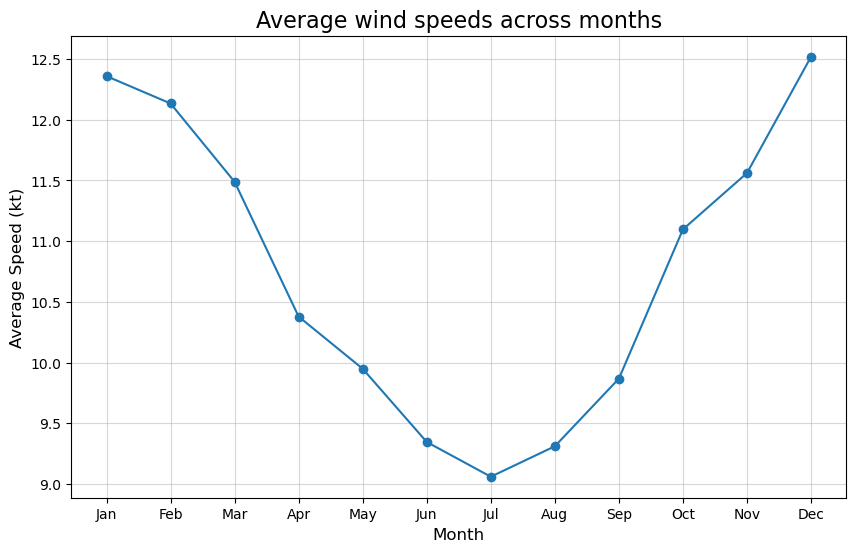

In [123]:
# Plotting the monthly average wind speed
plt.figure(figsize=(10, 6))

# line plot
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')

# adding title and labels
plt.title('Average wind speeds across months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Speed (kt)', fontsize=12)

# setting the x-axis labels to the month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# adding grid for better visibility
plt.grid(alpha=0.5)


Based on the plot, we can observe the following trends in average wind speeds across months:

1. Seasonal Variations
- Wind speed are highest in winter months with January and December the highest (December is showing the peak)
- Summer months have the lowest average wind speeds with July the lowest. 

2. Transition Periods
- Wind speeds decrease from January to July, reaching their lowest in mid-summer
- From August, wind speeds begin to increase, with a sharp rise during autumn (September to December).

3. Potential Insights:
- The data suggests a seasonal cycle where wind speeds peak during the colder months and dip during the warmer months.
- This information could be critical for planning wind energy projects, as energy output would vary seasonally, with higher potential in winter and lower output in summer.


Now, I would like to check how wind speeds vary annually at Roches Point. To do this, I need to create a new column in the data frame to store the year, then group the data by the year column and calculate the mean of the wind speed for each year. 

In [124]:
# Extracting the year from the datetime column
df['year'] = df['datetime'].dt.year

# Adding the year column to cleandf 
cleandf['year'] = df['year']

# Grouping by month and calculating the mean wind speed
annual_avg = cleandf.groupby('year')['wdsp'].mean()

# printing the monthly average wind speed
print(annual_avg)

year
1955    14.767160
1956    12.110997
1957    11.839155
1958    11.665297
1959    11.964612
          ...    
2020    13.123862
2021    11.782877
2022    12.417009
2023    12.360731
2024    12.333168
Name: wdsp, Length: 69, dtype: float64


To visualise the output of how wind speeds vary annually, I will create a line plot.

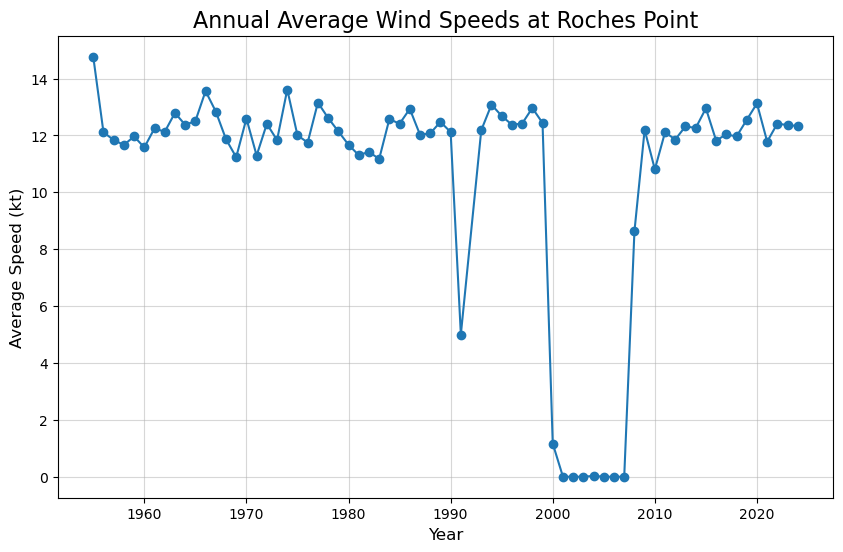

In [125]:
# Plotting the annual average wind speeds
plt.figure(figsize=(10, 6))

# line plot
plt.plot(annual_avg.index, annual_avg.values, marker='o')

# adding labels, title and grid
plt.title('Annual Average Wind Speeds at Roches Point', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Speed (kt)', fontsize=12)
plt.grid(alpha=0.5)

While we can see the how average wind speeds are over time, we can notice a significant gap in wind speed data between 2001 and 2007 that might suggests missing values in my dataset for that period. Let's check it by reviewing few rows of the year 2001 and 2007. I will also include last few rows od 2000 and first few rows of 2008 to be sure that only between years 2001-2007 data is missing.  How to do it, I found the information [here](https://stackoverflow.com/questions/50088007/print-specific-rows-and-columns-in-pandas).  

In [126]:
# Select rows from the year 2000 and 2008
rows_2000 = cleandf[cleandf['year'] == 2000].tail()  # Last few rows from 2000
rows_2001 = cleandf[cleandf['year'] == 2001].head()  # First few rows from 2001
rows_2007 = cleandf[cleandf['year'] == 2007].tail()  # Last few rows from 2007
rows_2008 = cleandf[cleandf['year'] == 2008].head()  # First few rows from 2001

# Combine rows from 2000 and 2008
selected_rows = pd.concat([rows_2000,rows_2001, rows_2007,rows_2008]) # Merge two data frames https://pandas.pydata.org/docs/reference/api/pandas.concat.html

# Print the selected rows
print(selected_rows)

        wddir  wdsp  month  year
376600    0.0   0.0     12  2000
376601    0.0   0.0     12  2000
376602    0.0   0.0     12  2000
376603    0.0   0.0     12  2000
376604    0.0   0.0     12  2000
376605    0.0   0.0      1  2001
376606    0.0   0.0      1  2001
376607    0.0   0.0      1  2001
376608    0.0   0.0      1  2001
376609    0.0   0.0      1  2001
437304    0.0   0.0     12  2007
437305    0.0   0.0     12  2007
437306    0.0   0.0     12  2007
437307    0.0   0.0     12  2007
437308    0.0   0.0     12  2007
437309    0.0   0.0      1  2008
437310    0.0   0.0      1  2008
437311    0.0   0.0      1  2008
437312    0.0   0.0      1  2008
437313    0.0   0.0      1  2008


As we can see, there is no wind speed and no wind direction data for years 2001-2007. To perform further analysis, I need to somehow handle this missing data. It is another type of missing data in this dataset (along with white spaces). There are few options of how to approach this issue:

1. Interpolate Missing Data - interpolation will fill in the missing values based on trends from other years. This works well if the missing period is small and the overall data is stable. See [askpython.com](https://www.askpython.com/python/examples/interpolation-to-fill-missing-entries)

2. Drop the Missing Period Exclude the years 2001-2007 from the analysis if the gap is too large or if interpolation might twist results.

3. Flag the Missing Data to identify missing data for future analysis, and keep the missing period in the dataset.

The best approach depends on the importance of data accuracy for the analysis and the potential impact of missing data on the results. I would like to retain the full time span of the dataset (1955–2024) and keep continuity in the analysis.

As wind speeds are typically seasonal and show smooth trends over time, making linear interpolation is a reasonable approach for filling the missing years.

## References:
***


https://docs.python.org/3/library/datetime.html

https://www.askpython.com/python-modules/pandas/data-frame-index-for-x-axis

https://stackoverflow.com/questions/50088007/print-specific-rows-and-columns-in-pandas

https://pandas.pydata.org/docs/reference/api/pandas.concat.html